In [ ]:
# Problem Statement

# The goal is to analyze the Netflix dataset to provide data-backed insights that can help 
# Netflix decide which type of shows/movies to produce and how to grow their business in 
# different countries.

In [3]:
# Import necessary libraries

import sys
import numpy as np
import pandas as pd 
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Show system and libraries informations

print("System/Python Information", sys.version)
print("Numpy Version", np.__version__)
print("Pandas Version", pd.__version__) 
print("Matplotlib Version",  mt.__version__)
print("Seabon Version", sns.__version__)

System/Python Information 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]
Numpy Version 1.26.4
Pandas Version 2.2.2
Matplotlib Version 3.8.4
Seabon Version 0.13.2


In [5]:
# Load the dataset 

dataset_path = 'netflix.csv'
netflix_data = pd.read_csv(dataset_path)

In [6]:
# Display first few rows of the dataset
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Basic Matrics

In [9]:
# Checking the shape of the dataset
dataset_shape = netflix_data.shape

# Checking data type of the attributes
dataset_dtypes = netflix_data.dtypes

## Result
print('## Result')
dataset_shape, dataset_dtypes

## Result


((8807, 12),
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object)

In [11]:
# Displaying basic metrics using the describe() method for numerical columns
basic_metrics_numerical = netflix_data.describe()

# Displaying basic metrics for categorical columns like 'Type', 'Country' and 'Rating'
basic_metrics_categorical = netflix_data[['type', 'country', 'rating']].describe(include = ['object'])

## Result
print('## Result')
basic_metrics_numerical, basic_metrics_categorical

## Result


(       release_year
 count   8807.000000
 mean    2014.180198
 std        8.819312
 min     1925.000000
 25%     2013.000000
 50%     2017.000000
 75%     2019.000000
 max     2021.000000,
          type        country rating
 count    8807           7976   8803
 unique      2            748     17
 top     Movie  United States  TV-MA
 freq     6131           2818   3207)

# Numerical Attributes
    For the numerical attribute release_year:

        Count: 8,807 entries
        Mean: Around the year 2014
        Standard Deviation: Approximately 8.82 years
        Minimum: Year 1925
        25th Percentile (Q1): Year 2013
        Median (50th Percentile): Year 2017
        75th Percentile (Q3): Year 2019
        Maximum: Year 2021

# Categorical Attributes
    For the categorical attributes type, country, and rating:

        Type

            Count: 8,807
            Unique Values: 2 (Movie, TV Show)
            Most Frequent: Movie
            Frequency: 6,131
        
        Country

            Count: 7,976 (some missing values)
            Unique Values: 748
            Most Frequent: United States
            Frequency: 2,818
        
        Rating

            Count: 8,803 (some missing values)
            Unique Values: 17
            Most Frequent: TV-MA
            Frequency: 3,207
            
# Observations
    1. The average release_year being around 2014, along with a median of 2017, suggests that Netflix has a lot of content from the recent decade.
    2. The high frequency of Movies compared to TV Shows indicates a stronger focus on movie content.
    3. The United States appears to be the most common country for content production, followed by a wide range of other countries, indicating a diverse content catalog.
    4. The rating “TV-MA” is the most frequent, suggesting a focus on mature audiences.    

In [12]:
# Convert categorical attributes to 'category' data type if required
categorical_columns = ['type', 'country', 'rating']

netflix_data[categorical_columns] = netflix_data[categorical_columns].astype('category')

# After conversion data types
after_conversion_data_types = netflix_data.dtypes

# Missing value detection
missing_values = netflix_data.isnull().sum()



## Result
after_conversion_data_types, missing_values

(show_id           object
 type            category
 title             object
 director          object
 cast              object
 country         category
 date_added        object
 release_year       int64
 rating          category
 duration          object
 listed_in         object
 description       object
 dtype: object,
 show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64)

# Data Types of All the Attributes (Before Conversion)
    Most of the attributes are of object data type, except release_year, which is an int64.

# Conversion of Categorical Attributes to ‘Category’
    The data types for type, country, and rating have been converted to category.

# Missing Value Detection
    director: 2,634 missing values
    cast: 825 missing values
    country: 831 missing values
    date_added: 10 missing values
    rating: 4 missing values
    duration: 3 missing values

In [13]:
# Non-Graphical Analysis: Value Counts and Unique Attributes

# Non-Graphical Analysis: Value counts for key attributes
value_counts_type = netflix_data['type'].value_counts()
value_counts_country = netflix_data['country'].value_counts().head(10)  # Top 10 countries
value_counts_rating = netflix_data['rating'].value_counts()
value_counts_release_year = netflix_data['release_year'].value_counts().head(10)  # Top 10 release years

# Unique attributes for key columns
unique_type = netflix_data['type'].unique()
unique_country = netflix_data['country'].unique()
unique_rating = netflix_data['rating'].unique()
unique_release_year = netflix_data['release_year'].unique()

value_counts_type, value_counts_country, value_counts_rating, value_counts_release_year, unique_type, unique_country, unique_rating, unique_release_year

(type
 Movie      6131
 TV Show    2676
 Name: count, dtype: int64,
 country
 United States     2818
 India              972
 United Kingdom     419
 Japan              245
 South Korea        199
 Canada             181
 Spain              145
 France             124
 Mexico             110
 Egypt              106
 Name: count, dtype: int64,
 rating
 TV-MA       3207
 TV-14       2160
 TV-PG        863
 R            799
 PG-13        490
 TV-Y7        334
 TV-Y         307
 PG           287
 TV-G         220
 NR            80
 G             41
 TV-Y7-FV       6
 UR             3
 NC-17          3
 74 min         1
 84 min         1
 66 min         1
 Name: count, dtype: int64,
 release_year
 2018    1147
 2017    1032
 2019    1030
 2020     953
 2016     902
 2021     592
 2015     560
 2014     352
 2013     288
 2012     237
 Name: count, dtype: int64,
 ['Movie', 'TV Show']
 Categories (2, object): ['Movie', 'TV Show'],
 ['United States', 'South Africa', NaN, 'India', 'United State

# Value Counts

# Type of Content (Movies vs. TV Shows)

    Movies: 6,131
    TV Shows: 2,676

# Top 10 Countries Producing Content

    United States: 2,818
    India: 972
    United Kingdom: 419
    Japan: 245
    South Korea: 199
    Canada: 181
    Spain: 145
    France: 124
    Mexico: 110
    Egypt: 106

# Ratings

    TV-MA: 3,207
    TV-14: 2,160
    TV-PG: 863
    R: 799
    PG-13: 490
    …

# Top 10 Release Years

    2018: 1,147
    2017: 1,032
    2019: 1,030
    2020: 953
    2016: 902
    …

# Unique Attributes
    Type: 2 unique values (‘Movie’, ‘TV Show’)
    Country: 748 unique values
    Rating: 17 unique values
    Release Year: Ranges from 1925 to 2021

# Observations
    1. The platform predominantly offers movies, almost twice as many as TV Shows.
    2. The United States is the leading country in producing content, followed by India and the United Kingdom.
    3. The most common ratings are ‘TV-MA’ and ‘TV-14’, indicating a focus on mature and teen audiences.
    4. Most of the content was released in the years 2018, 2017, and 2019, showing a strong focus on recent content.

In [ ]:
# 5 - Missing Value & Outlier Check
# Before we proceed further with additional visualizations, It's crucial to check
# for missiong values and outliers


In [14]:
# Mission Values

# Checking for missing values
missing_values = netflix_data.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Observations:

    We have missing values in several columns:

        director: 2,634 missing values
        cast: 825 missing values
        country: 831 missing values
        date_added: 10 missing values
        rating: 4 missing values
        duration: 3 missing values


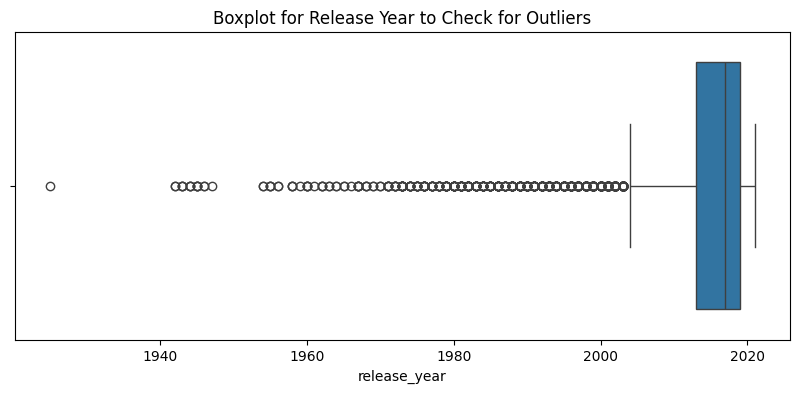

In [15]:
# Boxplot to check for outliers in 'release_year'
plt.figure(figsize=(10, 4))
sns.boxplot(x=netflix_data['release_year'])
plt.title('Boxplot for Release Year to Check for Outliers')
plt.show()

In [ ]:
# Uni